# Prophet Expo - Evan Shope , Taylor Last

## Install packages

In [1]:
# !pip install pystan
# !pip install fbprophet
# !pip3 install plotly

## Import packages

In [2]:
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot
from prophet.diagnostics import cross_validation

import pandas as pd
import numpy as np
import datetime
import plotly
import matplotlib.pyplot as plt

## Read in the data - Australia daily minimum temperatures (C*)

In [3]:
temps = pd.read_csv('daily-min-temperatures.csv')

## Prep the DataFrame

In [4]:
temps['ds'] = pd.to_datetime(temps['Date'])
temps['y'] = temps['Temp']

In [5]:
temps = temps.drop(['Date','Temp'],axis=1)

In [6]:
# temps.dtypes
temps.head()

ds     y
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8

## Fit the model with Prophet object

In [7]:
# change interval_width based on trend uncertainty (default = .8)
# change changepoint_prior_scale to .025 (defaut = .1)
m = Prophet(changepoint_prior_scale = .025)

In [8]:
m.fit(temps)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Making future dates

In [9]:
# Make 365 days in the future - Default
future_days = m.make_future_dataframe(periods=365)
print(future_days.tail())

# Make 12 months in the future
future_months = m.make_future_dataframe(periods=12, freq = 'M')
print(future_months.tail())

# Make 5 years in the future
future_years = m.make_future_dataframe(periods=5, freq = 'Y')
print(future_years.tail())

             ds
4010 1991-12-27
4011 1991-12-28
4012 1991-12-29
4013 1991-12-30
4014 1991-12-31
             ds
3657 1991-08-31
3658 1991-09-30
3659 1991-10-31
3660 1991-11-30
3661 1991-12-31
             ds
3650 1991-12-31
3651 1992-12-31
3652 1993-12-31
3653 1994-12-31
3654 1995-12-31


## In-sample fit for historical sales (yhat)

In [10]:
historical_fit = m.predict(temps)
historical_fit[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# historical_fit

ds       yhat  yhat_lower  yhat_upper
0    1981-01-01  14.998291   11.948421   18.446991
1    1981-01-02  15.045519   11.351486   18.854291
2    1981-01-03  15.082456   11.575380   18.595483
3    1981-01-04  15.065533   11.619974   18.439850
4    1981-01-05  15.271676   11.450729   18.676123
...         ...        ...         ...         ...
3645 1990-12-27  14.669335   11.120803   18.074057
3646 1990-12-28  14.700642   11.344737   18.225867
3647 1990-12-29  14.727550   11.278687   18.464235
3648 1990-12-30  14.706948   11.322920   18.353706
3649 1990-12-31  14.916045   11.371920   18.395273

[3650 rows x 4 columns]

## Forecasting sales for future dates (in days)

In [11]:
forecast = m.predict(future_days)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
4010 1991-12-27  14.784484   11.175737   18.161144
4011 1991-12-28  14.804555   11.363334   18.197737
4012 1991-12-29  14.778101   11.149916   18.190465
4013 1991-12-30  14.982521   11.707165   18.287022
4014 1991-12-31  15.155852   11.849105   18.539489

## Plot of forecast plot

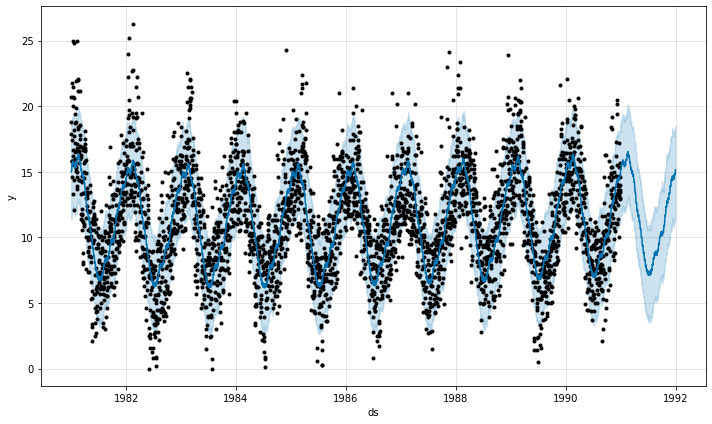

In [12]:
forecast_days_plot = m.plot(forecast)
plt.style.use('ggplot')
plt.show(forecast_days_plot)

### Plot with changepoints

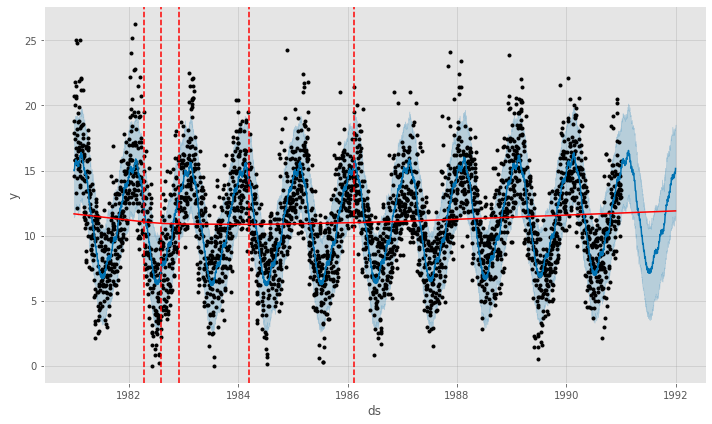

In [13]:
forecast_days_plot = m.plot(forecast)
plt.style.use('ggplot')
a = add_changepoints_to_plot(forecast_days_plot.gca(), m, forecast)
plt.show(forecast_days_plot)

## Plot forecast components 

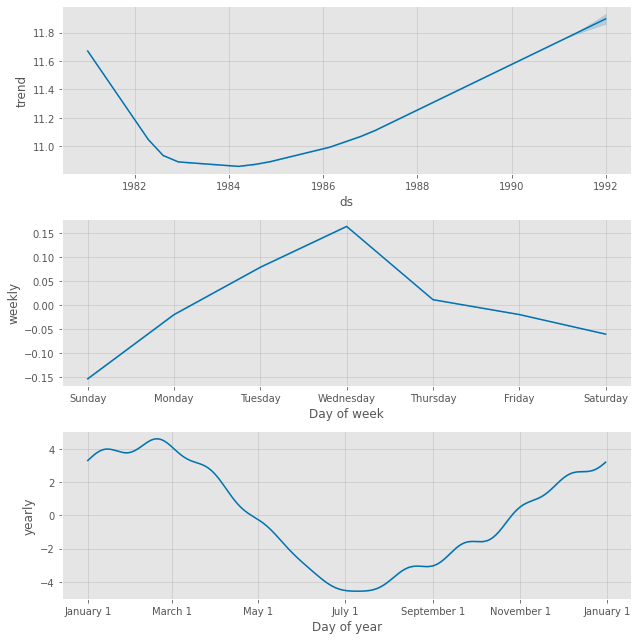

In [14]:
plt.show(m.plot_components(forecast))

In [15]:
plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)